In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Activation & Dense Layer
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def my_dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        z = np.dot(a_in, W[:, j]) + b[j]
        a_out[j] = g(z)
    return a_out


In [3]:
# Model Architecture
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return a3


In [4]:
# Data Preparation
def prepare_data():
    digits = load_digits()
    X, y = digits.data, digits.target
    idx = np.where((y == 0) | (y == 1))
    X, y = X[idx], y[idx].reshape(-1, 1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#  Weight Initialization
def initialize_weights():
    W1 = np.random.randn(64, 25) * 0.01
    b1 = np.zeros(25)
    W2 = np.random.randn(25, 15) * 0.01
    b2 = np.zeros(15)
    W3 = np.random.randn(15, 1) * 0.01
    b3 = np.zeros(1)
    return W1, b1, W2, b2, W3, b3


In [6]:
#Forward Pass & Metrics
def forward_pass(X, weights):
    outputs = []
    for x in X:
        out = my_sequential(x, *weights)
        outputs.append(out)
    return np.array(outputs).reshape(-1, 1)

def compute_loss(y, y_hat):
    m = y.shape[0]
    return -1/m * np.sum(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))

def compute_accuracy(y, y_hat):
    y_pred = y_hat >= 0.5
    return np.mean(y.flatten() == y_pred.flatten())


In [9]:
#Training Loop
def train(X, y, weights, epochs=1000, lr=0.1):
    W1, b1, W2, b2, W3, b3 = weights
    m = X.shape[0]
    for epoch in range(epochs):
        dW1, db1 = np.zeros_like(W1), np.zeros_like(b1)
        dW2, db2 = np.zeros_like(W2), np.zeros_like(b2)
        dW3, db3 = np.zeros_like(W3), np.zeros_like(b3)
        loss = 0

        for i in range(m):
            x_i = X[i]
            y_i = y[i]

            z1 = np.dot(x_i, W1) + b1
            a1 = sigmoid(z1)
            z2 = np.dot(a1, W2) + b2
            a2 = sigmoid(z2)
            z3 = np.dot(a2, W3) + b3
            a3 = sigmoid(z3)

            loss += - (y_i * np.log(a3 + 1e-8) + (1 - y_i) * np.log(1 - a3 + 1e-8))

            dz3 = a3 - y_i
            dW3 += np.outer(a2, dz3)
            db3 += dz3

            dz2 = np.dot(W3, dz3) * a2 * (1 - a2)
            dW2 += np.outer(a1, dz2)
            db2 += dz2

            dz1 = np.dot(W2, dz2) * a1 * (1 - a1)
            dW1 += np.outer(x_i, dz1)
            db1 += dz1

        loss /= m
        W1 -= lr * dW1 / m
        b1 -= lr * db1 / m
        W2 -= lr * dW2 / m
        b2 -= lr * db2 / m
        W3 -= lr * dW3 / m
        b3 -= lr * db3 / m

        if epoch % 200 == 0:
            print(f"Epoch {epoch}: Loss = {float(loss):.4f}")


    return W1, b1, W2, b2, W3, b3


In [10]:
#  Main Execution
X_train, X_test, y_train, y_test = prepare_data()
weights = initialize_weights()
weights = train(X_train, y_train, weights)
y_hat_test = forward_pass(X_test, weights)
acc = compute_accuracy(y_test, y_hat_test)
print(f"\nFinal test accuracy: {acc*100:.2f}%")


Epoch 0: Loss = 0.6932
Epoch 200: Loss = 0.6931
Epoch 400: Loss = 0.6931
Epoch 600: Loss = 0.6931
Epoch 800: Loss = 0.6931

Final test accuracy: 51.39%


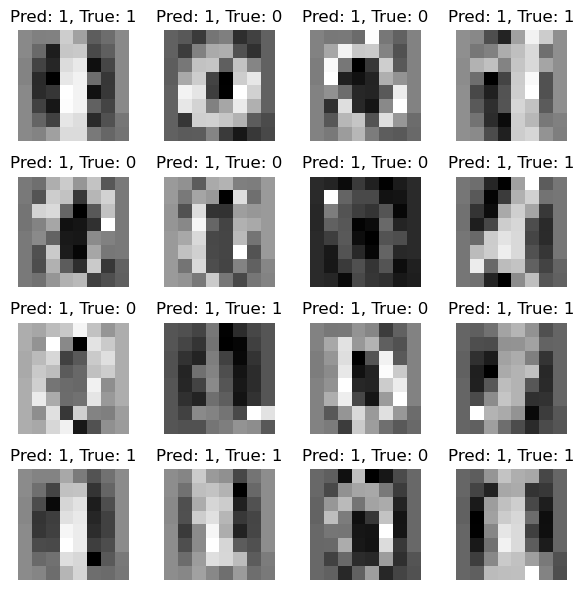

In [11]:
# Plot Results
fig, axes = plt.subplots(4, 4, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8,8), cmap='gray')
    pred = int(y_hat_test[i] >= 0.5)
    ax.set_title(f"Pred: {pred}, True: {y_test[i][0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
